In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='charges', ylabel='Count'>

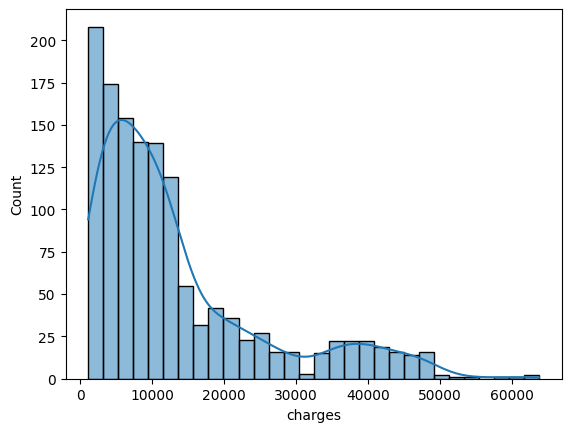

In [7]:
sns.histplot(data=df, x='charges', kde=True)

<Axes: xlabel='charges'>

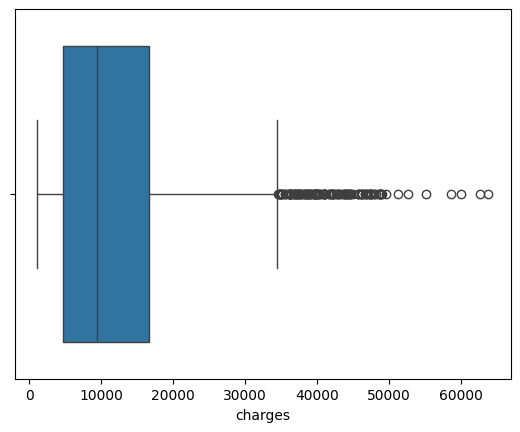

In [8]:
sns.boxplot(data=df, x='charges')

<Axes: xlabel='bmi', ylabel='Count'>

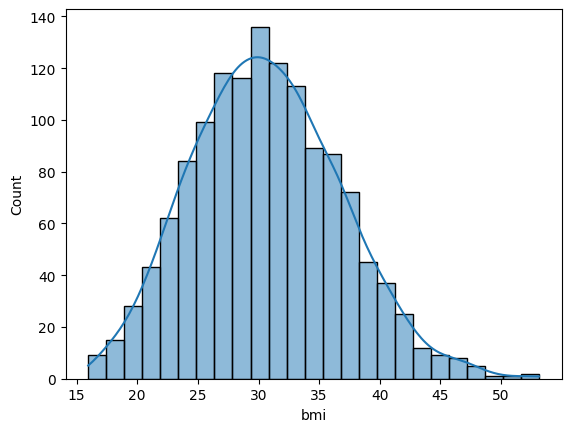

In [9]:
sns.histplot(data=df, x='bmi', kde=True)

<Axes: xlabel='bmi'>

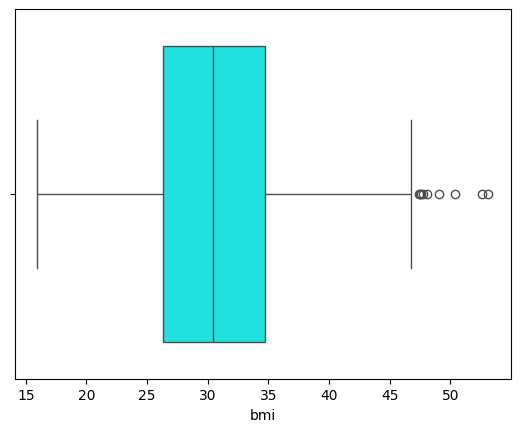

In [10]:
sns.boxplot(data=df, x='bmi', color='cyan')

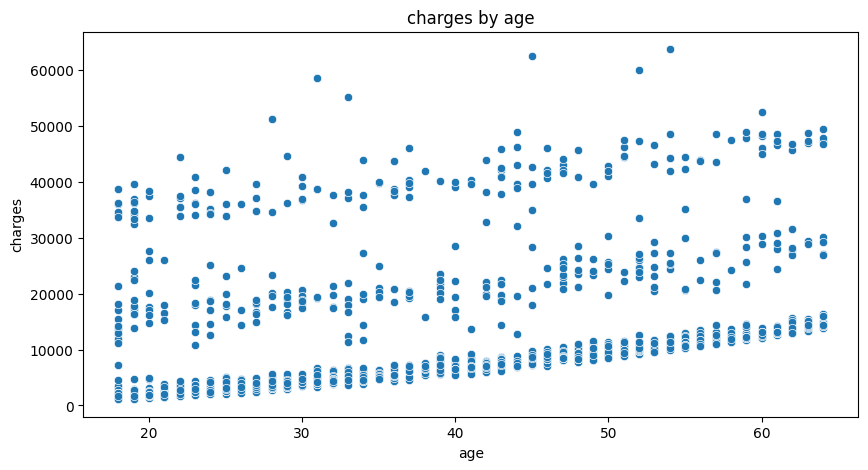

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='age', y='charges')
plt.title('charges by age')
plt.show()

In [12]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

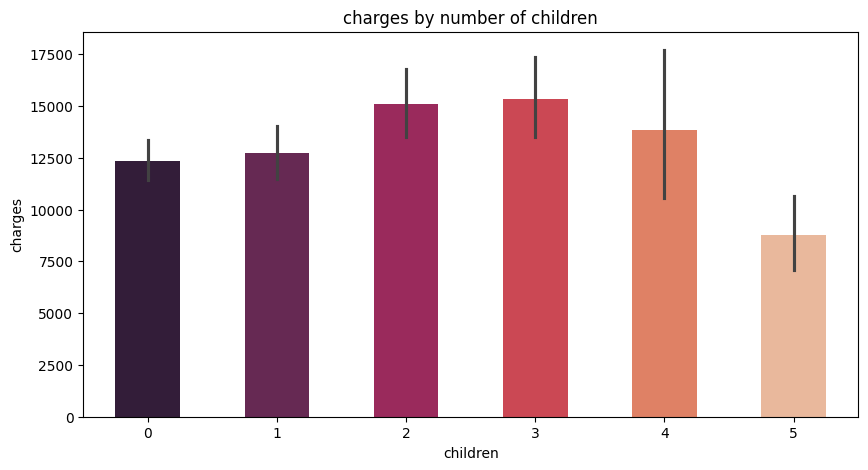

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='children', y='charges', palette='rocket', width=0.5)
plt.title('charges by number of children')
plt.show()

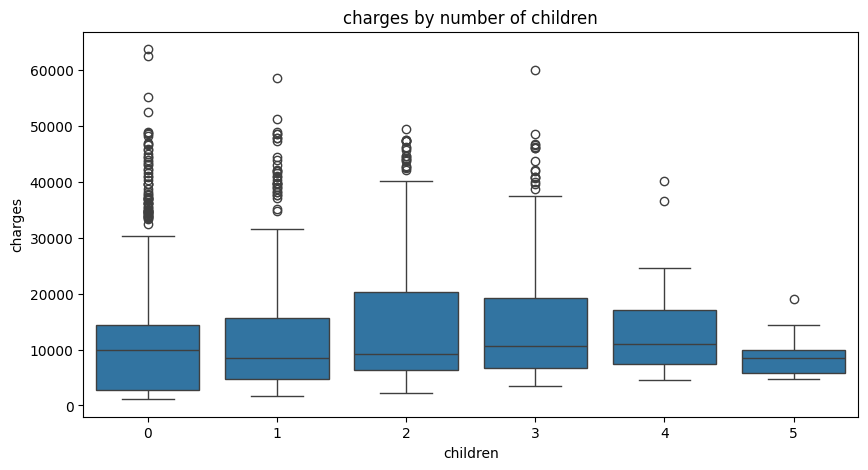

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='children', y='charges')
plt.title('charges by number of children')
plt.show()

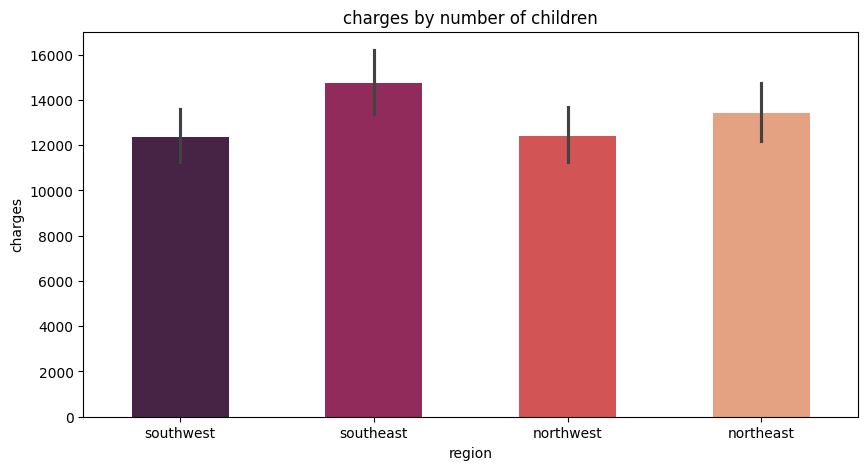

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='region', y='charges', palette='rocket', width=0.5)
plt.title('charges by number of children')
plt.show()

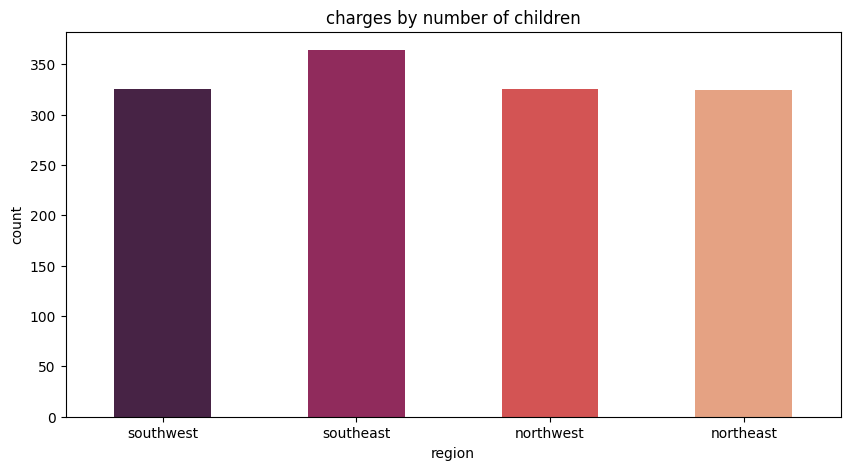

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='region', palette='rocket', width=0.5)
plt.title('charges by number of children')
plt.show()

In [17]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Axes: xlabel='bmi', ylabel='charges'>

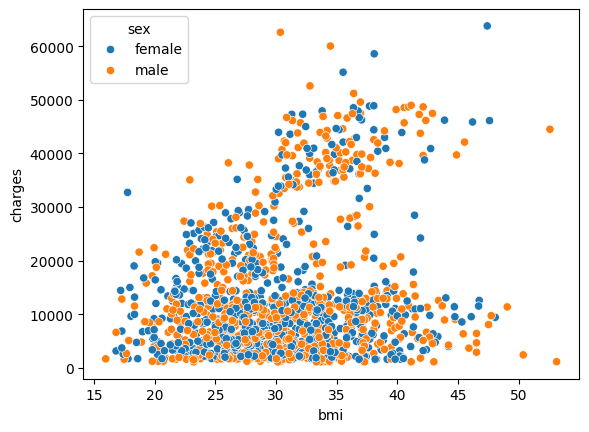

In [18]:
sns.scatterplot(data=df, x='bmi', y='charges', hue='sex')

In [19]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
cols = {'sex', 'smoker', 'region'}
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [23]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [ ]:

import numpy as np
z = np.abs((df - df.mean()) / df.std())
threshold = 3
dt = df[(z < threshold).all(axis=1)]


In [25]:
X = df.drop(['charges'], axis=1)
y = df['charges']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
rg_model = LinearRegression()
rg_model.fit(X_train, y_train)
y_pred = rg_model.predict(X_test)

In [28]:
rg_model

LinearRegression()

In [29]:
linear_r2= r2_score(y_test, y_pred)
erreur_moyen = mean_squared_error(y_test, y_pred)

print("L'erreur moyen est : ",erreur_moyen)
print("Le score lineare r2 est : ",linear_r2)

L'erreur moyen est :  33635210.431178406
Le score lineare r2 est :  0.7833463107364539


<Axes: xlabel='charges'>

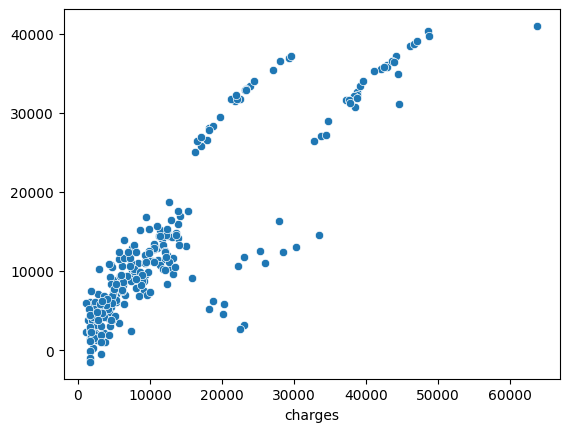

In [30]:
sns.scatterplot(x=y_test, y=y_pred, )

In [31]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
linear_r2= r2_score(y_test, y_pred)
erreur_moyen = mean_squared_error(y_test, y_pred)

print("L'erreur moyen est : ",erreur_moyen)
print("Le score lineare r2 est : ",linear_r2)

L'erreur moyen est :  33675792.1542023
Le score lineare r2 est :  0.7830849126391299


In [32]:
ls = Lasso()
ls.fit(X_train, y_train)
y_pred = ls.predict(X_test)
linear_r2= r2_score(y_test, y_pred)
erreur_moyen = mean_squared_error(y_test, y_pred)

print("L'erreur moyen est : ",erreur_moyen)
print("Le score lineare r2 est : ",linear_r2)

L'erreur moyen est :  33639339.30574759
Le score lineare r2 est :  0.7833197155138745


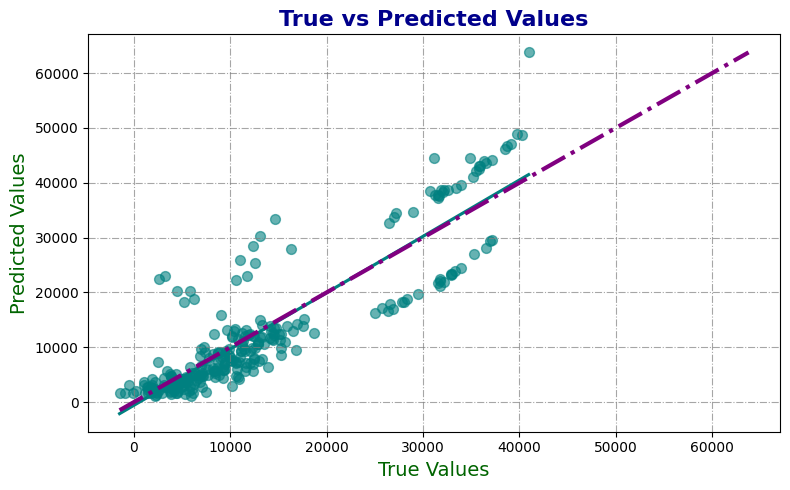

In [33]:
plt.figure(figsize=(8,5))
sns.regplot(x=y_pred, y=y_test, ci=None, color='teal', scatter_kws={'s':50, 'alpha':0.6})

# Plotting reference line for perfect prediction
max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))

# Plotting a line from min to max value for reference
plt.plot([min_val, max_val], [min_val, max_val], color='purple', linestyle='-.', lw=3)

# Setting plot titles and labels
plt.title('True vs Predicted Values', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('True Values', fontsize=14, color='darkgreen')
plt.ylabel('Predicted Values', fontsize=14, color='darkgreen')

# Adding grid and adjusting layout
plt.grid(True, linestyle='-.', alpha=0.7, color='grey')

plt.tight_layout()
plt.show()